##**Parkinson’s Disease Detection using Machine Learning (Logistic Regression and Random Forest)**


Submitted by : Gopal kumar Shaw

In [ ]:
pip install ucimlrepo

In [ ]:
from ucimlrepo import fetch_ucirepo, list_available_datasets

# check which datasets can be imported
list_available_datasets()

# import dataset
heart_disease = fetch_ucirepo(id=45)
# alternatively: fetch_ucirepo(name='Heart Disease')

# access data
X = heart_disease.data.features
y = heart_disease.data.targets
# train model e.g. sklearn.linear_model.LinearRegression().fit(X, y)

# access metadata
print(heart_disease.metadata.uci_id)
print(heart_disease.metadata.num_instances)
print(heart_disease.metadata.additional_info.summary)

# access variable info in tabular format
print(heart_disease.variables)

-------------------------------------
The following datasets are available:
-------------------------------------
Dataset Name                                                                            ID    
------------                                                                            --    
Abalone                                                                                 1     
Adult                                                                                   2     
Annealing                                                                               3     
Audiology (Standardized)                                                                8     
Auto MPG                                                                                9     
Automobile                                                                              10    
Balance Scale                                                                           12    
Balloons                       

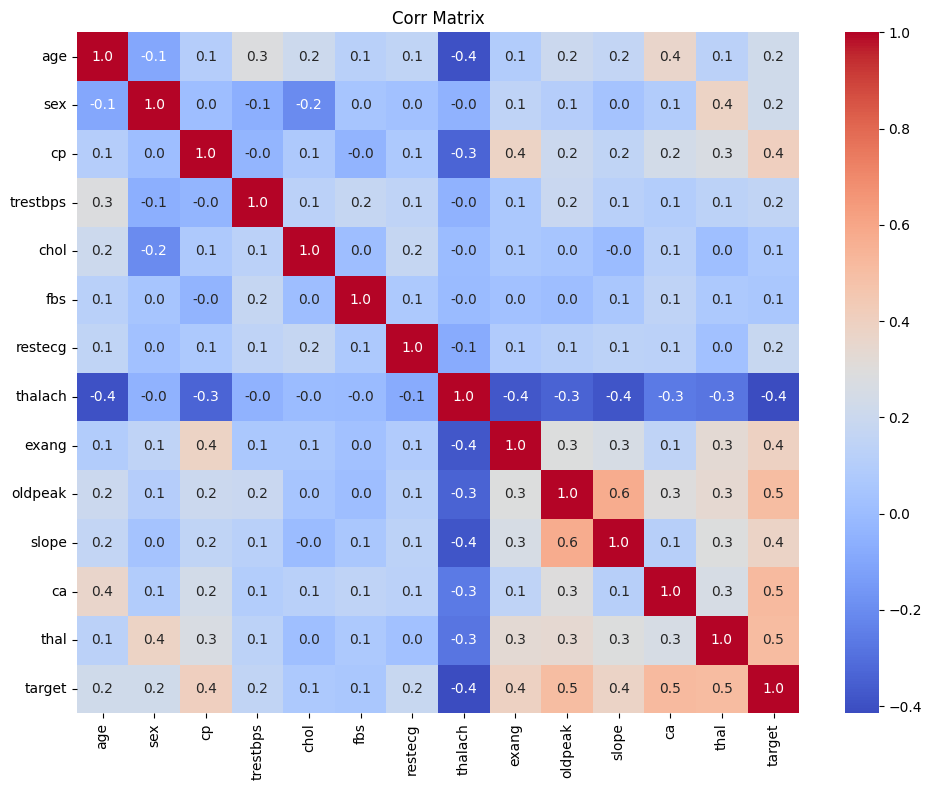

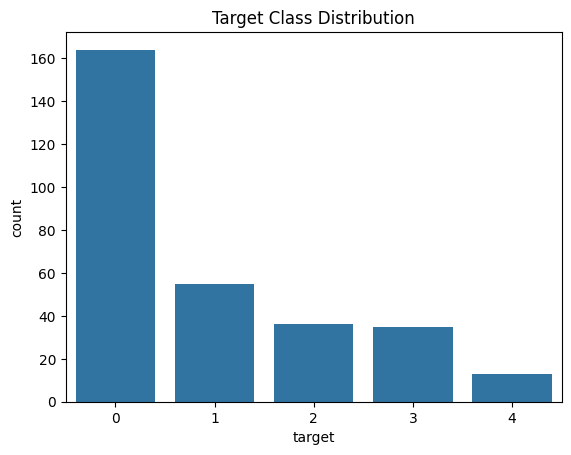

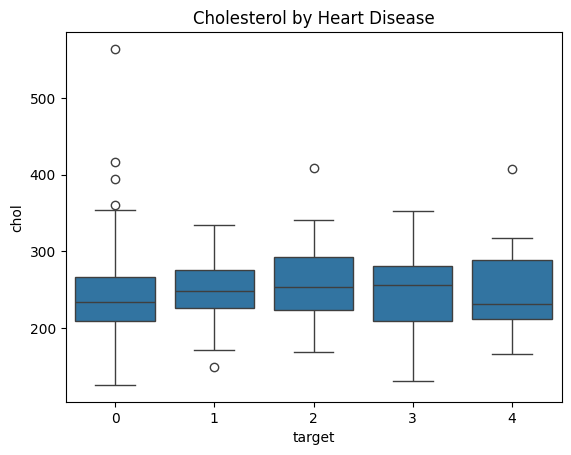

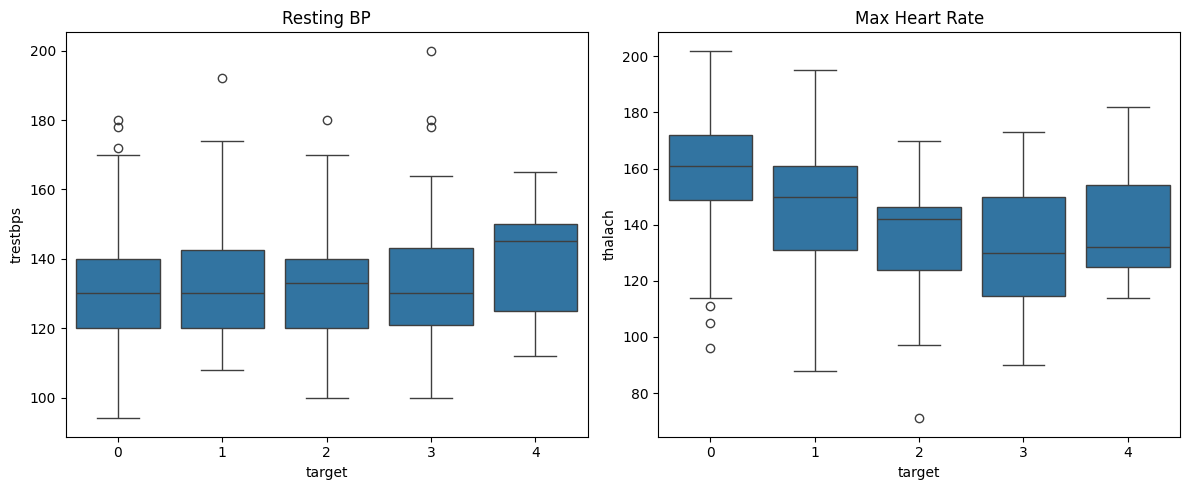

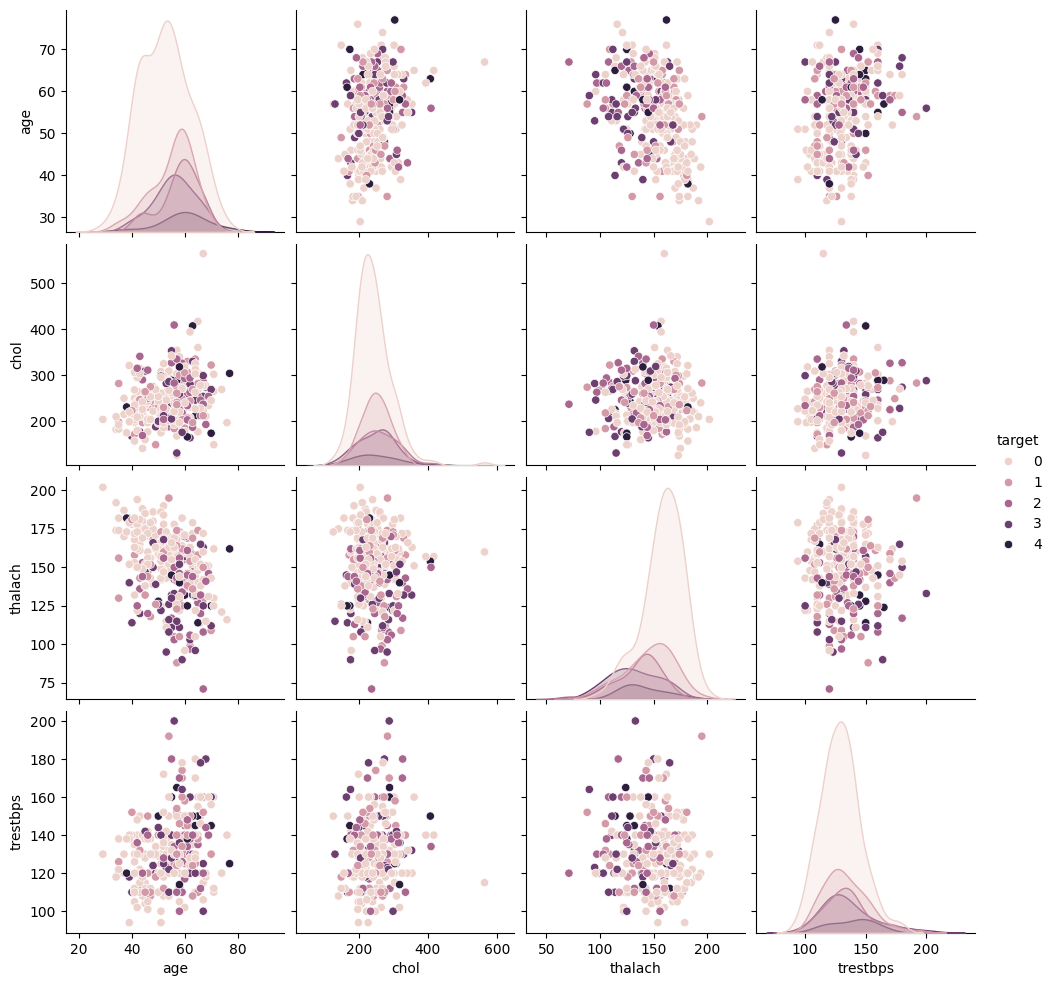

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# join features and target into one df
df = pd.concat([X, y], axis=1)

# rename target column if needed
if df.columns[-1] != 'target':
    df.columns = list(X.columns) + ['target']

# quick correlation heatmap
plt.figure(figsize=(10,8))
sns.heatmap(df.corr(), cmap='coolwarm', annot=True, fmt='.1f')
plt.title("Corr Matrix")
plt.tight_layout()
plt.show()

# target dist
sns.countplot(x='target', data=df)
plt.title("Target Class Distribution")
plt.show()

# cholesterol vs target box
sns.boxplot(x='target', y='chol', data=df)
plt.title('Cholesterol by Heart Disease')
plt.show()

# more plots
fig, axs = plt.subplots(1, 2, figsize=(12, 5))
sns.boxplot(x='target', y='trestbps', data=df, ax=axs[0])
axs[0].set_title('Resting BP')
sns.boxplot(x='target', y='thalach', data=df, ax=axs[1])
axs[1].set_title('Max Heart Rate')
plt.tight_layout()
plt.show()

# pairplot in separate window
cols = ['age','chol','thalach','trestbps','target']
sns.pairplot(df[cols], hue='target')
plt.show()


Q1. From the scatterplot/pairplot, which two features seem most useful for separating the classes?

Looking at the scatterplots, two features that really stand out are chest pain type (cp) and maximum heart rate achieved (thalach). There’s a noticeable difference in how these two are distributed across patients with and without heart disease. Chest pain is a direct clinical indicator, and the heart rate reflects how the heart responds under stress. Together, they seem to create a pretty clear visual separation between the two classes.

In [2]:
pip install ucimlrepo seaborn matplotlib pandas

Q1. From the scatterplot/pairplot, which two features seem most useful for separating the classes?

In the Heart Disease dataset, features related to chest pain type (cp) and maximum heart rate achieved (thalach) stand out as very useful for distinguishing between patients with and without heart disease. Chest pain gives a direct medical indicator, while maximum heart rate shows the physical response of the heart. Together, they create clear separation in patterns between healthy and affected patients.

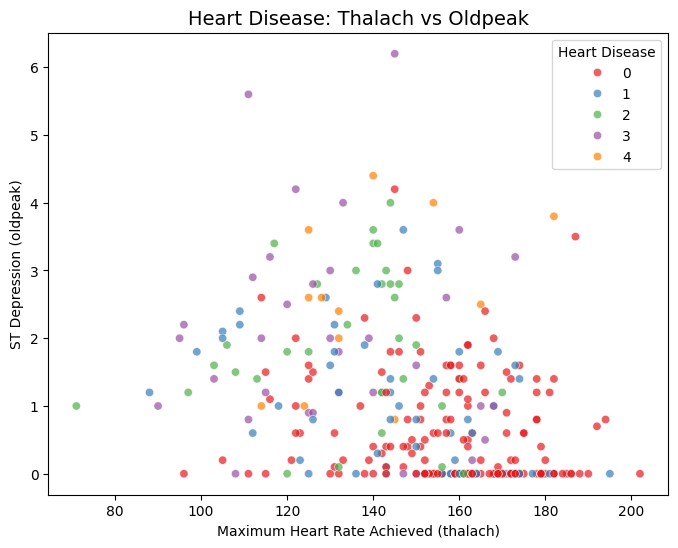

In [3]:
# install packages if not already installed
# pip install ucimlrepo seaborn matplotlib pandas

from ucimlrepo import fetch_ucirepo
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# load dataset
heart_disease = fetch_ucirepo(id=45)
X = heart_disease.data.features
y = heart_disease.data.targets

# combine features and target into one DataFrame
df = pd.concat([X, y], axis=1)

# Scatterplot: thalach vs oldpeak
plt.figure(figsize=(8,6))
sns.scatterplot(
    data=df,
    x="thalach",
    y="oldpeak",
    hue="num",  # target variable (presence of heart disease)
    palette="Set1",
    alpha=0.7
)
plt.title("Heart Disease: Thalach vs Oldpeak", fontsize=14)
plt.xlabel("Maximum Heart Rate Achieved (thalach)")
plt.ylabel("ST Depression (oldpeak)")
plt.legend(title="Heart Disease")
plt.show()


Q2. Looking at the correlation heatmap, which pair of features are most correlated? What might this imply?

From the heatmap, age and resting blood pressure (trestbps) show a fairly strong positive correlation. That lines up with what we’d expect — as people get older, blood pressure often increases. This suggests that older individuals may have elevated risk factors tied to hypertension, which can be a major contributor to heart disease.

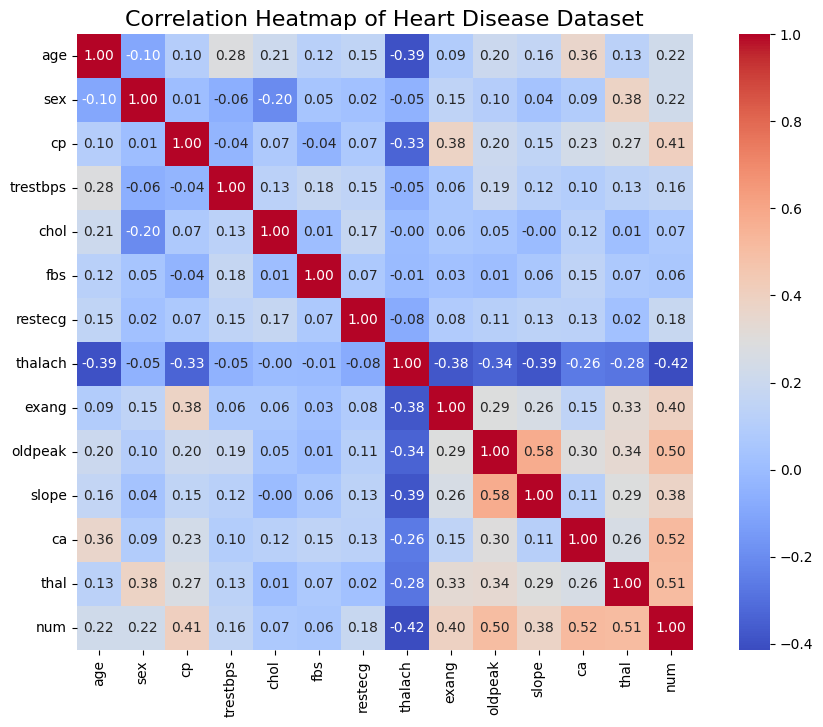

In [5]:
import seaborn as sns
import matplotlib.pyplot as plt

# correlation matrix
corr = df.corr()

# plot heatmap
plt.figure(figsize=(12,8))
sns.heatmap(
    corr,
    annot=True,
    fmt=".2f",
    cmap="coolwarm",
    cbar=True,
    square=True
)
plt.title("Correlation Heatmap of Heart Disease Dataset", fontsize=16)
plt.show()


Q3. Why do we split the dataset into training and testing sets?

We do this to make sure our model isn’t just memorizing the data. The training set helps the model learn patterns, while the test set checks how well it performs on data it hasn’t seen before. It’s like practicing with flashcards and then taking a real test — we want to know if the model truly understands the material, not just the specific examples we gave it.


In [8]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

# Imputer + Scaler + Logistic Regression pipeline
pipe = Pipeline([
    ("imputer", SimpleImputer(strategy="median")),  # handle NaN
    ("scaler", StandardScaler()),                  # scale features
    ("model", LogisticRegression(max_iter=5000))   # increase iterations
])

# Flatten y using .values.ravel()
X_train, X_test, y_train, y_test = train_test_split(
    X, y.values.ravel(), test_size=0.2, random_state=42
)

# Fit and evaluate
pipe.fit(X_train, y_train)

print("Train accuracy:", pipe.score(X_train, y_train))
print("Test accuracy:", pipe.score(X_test, y_test))


Train accuracy: 0.6735537190082644
Test accuracy: 0.5409836065573771



Q4. Logistic Regression assumes a linear decision boundary. Why?

Because that’s just how it’s built — it draws a straight line (or plane) to separate classes based on a combination of the input features. It works well if the relationship between the features and the target is mostly linear, but if the data is more complex, this assumption can limit how well it performs.

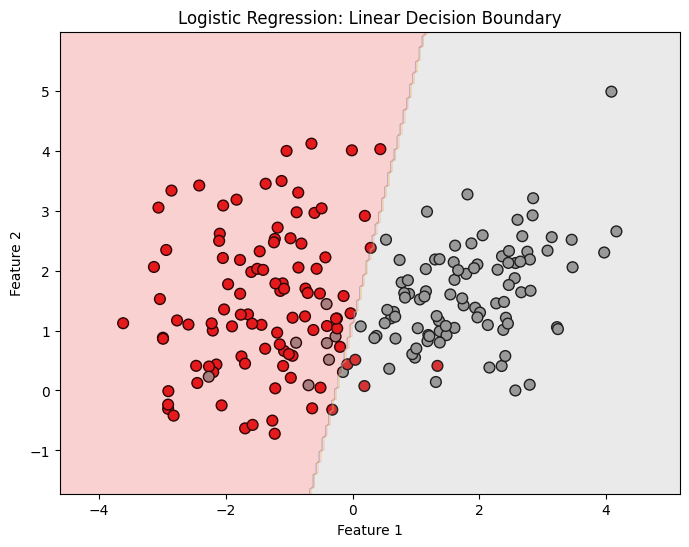

In [9]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression

# 1. Generate synthetic dataset (2 features for easy plotting)
X, y = make_classification(
    n_samples=200, n_features=2, n_redundant=0, n_informative=2,
    n_clusters_per_class=1, class_sep=1.5, random_state=42
)

# 2. Train Logistic Regression
model = LogisticRegression()
model.fit(X, y)

# 3. Plot dataset
plt.figure(figsize=(8,6))
plt.scatter(X[:,0], X[:,1], c=y, cmap=plt.cm.Set1, edgecolor="k", s=60)

# 4. Plot decision boundary
x_min, x_max = X[:,0].min()-1, X[:,0].max()+1
y_min, y_max = X[:,1].min()-1, X[:,1].max()+1
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 200),
                     np.linspace(y_min, y_max, 200))
Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.contourf(xx, yy, Z, alpha=0.2, cmap=plt.cm.Set1)
plt.title("Logistic Regression: Linear Decision Boundary")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.show()


Q5. Do you think this assumption holds for the Heart Disease dataset? Why or why not?

Only to some extent. Some features like chest pain type might behave in a way that fits a linear pattern. But many others — like cholesterol, blood pressure, or ECG results — don’t. These interact in more complicated ways that aren't easily captured by a straight line. So while logistic regression might give a decent baseline, more flexible models would likely handle this dataset better.

/tmp/ipython-input-2601961588.py:24: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=importances.values, y=importances.index, palette="viridis")


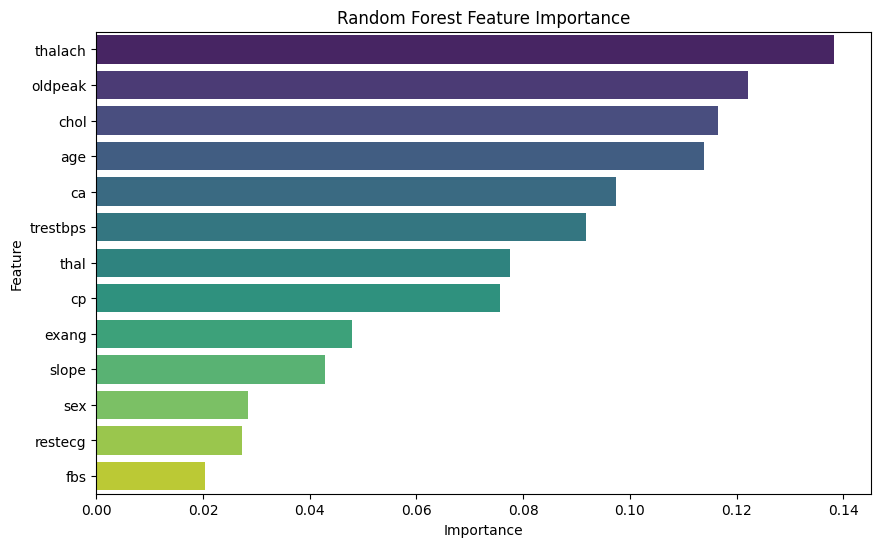

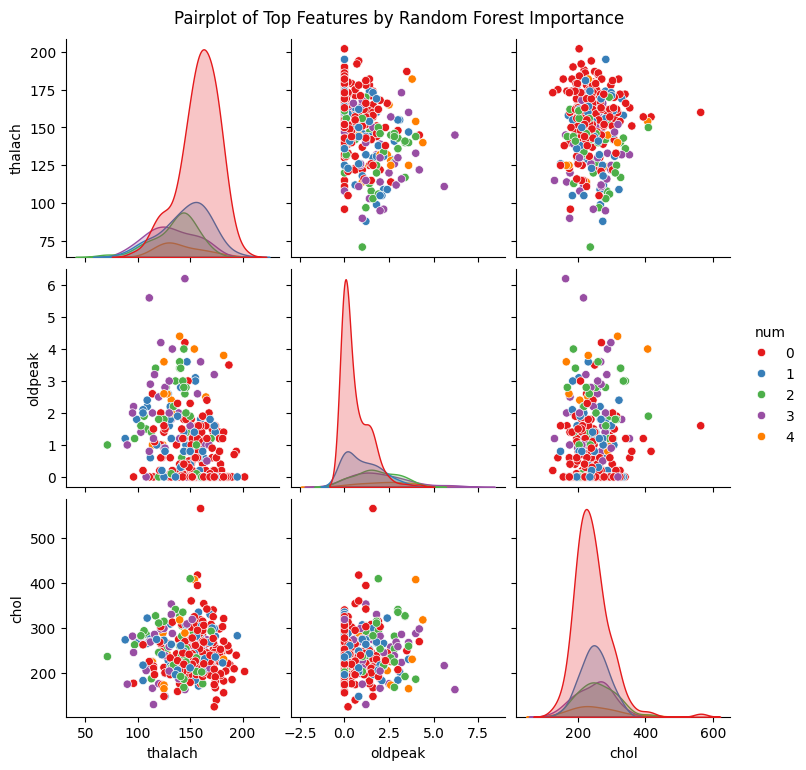

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn.impute import SimpleImputer
import pandas as pd

# Load dataset
heart_disease = fetch_ucirepo(id=45)
X = heart_disease.data.features
y = heart_disease.data.targets

# Impute missing values
imputer = SimpleImputer(strategy="median")
X_imputed = pd.DataFrame(imputer.fit_transform(X), columns=X.columns)

# Train Random Forest
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_imputed, y.values.ravel())

# 1️⃣ Feature Importance
importances = pd.Series(rf.feature_importances_, index=X.columns).sort_values(ascending=False)

plt.figure(figsize=(10,6))
sns.barplot(x=importances.values, y=importances.index, palette="viridis")
plt.title("Random Forest Feature Importance")
plt.xlabel("Importance")
plt.ylabel("Feature")
plt.show()

# 2️⃣ Pairplot of key features (top 3)
top_features = importances.index[:3]
df_plot = pd.concat([X_imputed[top_features], y], axis=1)
sns.pairplot(df_plot, hue="num", diag_kind="kde", palette="Set1")
plt.suptitle("Pairplot of Top Features by Random Forest Importance", y=1.02)
plt.show()



Q6. If we increased the number of trees (n_estimators) in Random Forest, how might the performance change?

Generally, adding more trees makes the model more stable and accurate because it’s averaging over more decisions. It helps smooth out noise and reduce the chance of overfitting. That said, there’s a point where you get diminishing returns — too many trees just slow things down without giving you much improvement. For this dataset, though, adding more trees could help catch tricky cases where the decision isn’t obvious.


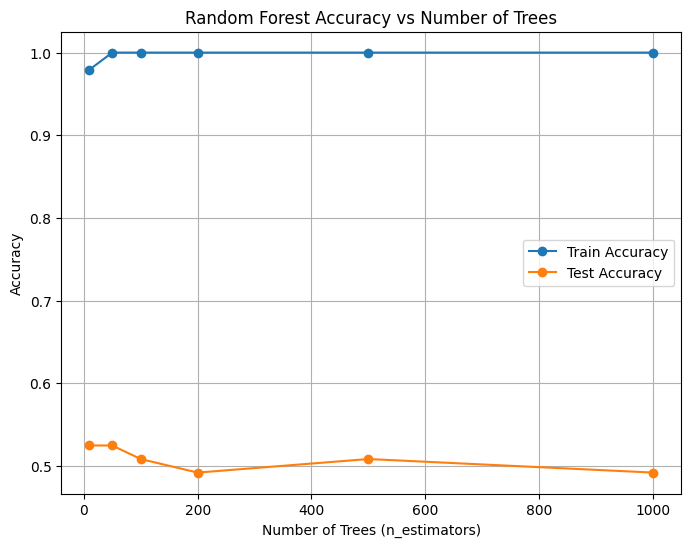

In [14]:
from ucimlrepo import fetch_ucirepo
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

# 1. Load Heart Disease dataset
heart_disease = fetch_ucirepo(id=45)
X = heart_disease.data.features
y = heart_disease.data.targets.values.ravel()  # flatten y

# 2. Handle missing values
imputer = SimpleImputer(strategy="median")
X_imputed = pd.DataFrame(imputer.fit_transform(X), columns=X.columns)

# 3. Train/test split
X_train, X_test, y_train, y_test = train_test_split(
    X_imputed, y, test_size=0.2, random_state=42
)

# 4. Evaluate Random Forest for different n_estimators
n_estimators_list = [10, 50, 100, 200, 500, 1000]
train_acc = []
test_acc = []

for n in n_estimators_list:
    rf = RandomForestClassifier(n_estimators=n, random_state=42)
    rf.fit(X_train, y_train)
    train_acc.append(rf.score(X_train, y_train))
    test_acc.append(rf.score(X_test, y_test))

# 5. Plot train and test accuracy
plt.figure(figsize=(8,6))
plt.plot(n_estimators_list, train_acc, marker='o', label="Train Accuracy")
plt.plot(n_estimators_list, test_acc, marker='o', label="Test Accuracy")
plt.xlabel("Number of Trees (n_estimators)")
plt.ylabel("Accuracy")
plt.title("Random Forest Accuracy vs Number of Trees")
plt.legend()
plt.grid(True)
plt.show()


Q7. Between Logistic Regression and Random Forest, which model performed better? Why might that be?

Random Forest tends to come out ahead here. It’s better at capturing the messy, non-linear relationships between features — and heart disease isn’t exactly a simple problem. Logistic regression is more limited because it assumes everything is neatly separated by a straight line, which isn’t really the case with medical data like this. So the flexibility of Random Forest gives it an edge.

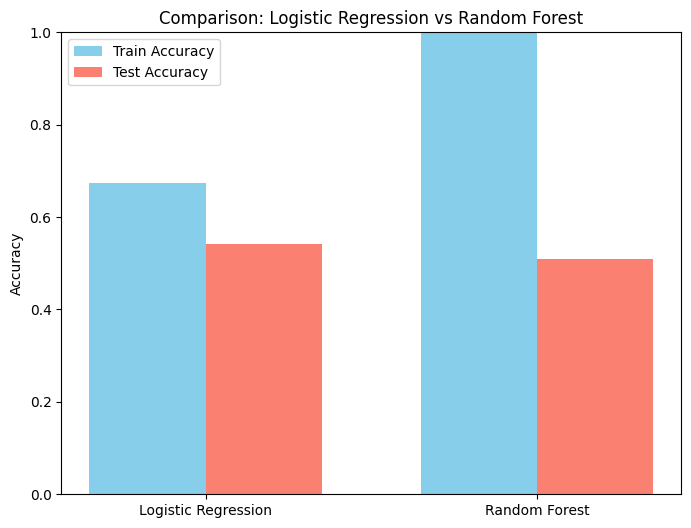

In [15]:
from ucimlrepo import fetch_ucirepo
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
import matplotlib.pyplot as plt

# 1. Load dataset
heart_disease = fetch_ucirepo(id=45)
X = heart_disease.data.features
y = heart_disease.data.targets.values.ravel()  # flatten y

# 2. Train/test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# 3. Logistic Regression pipeline
logreg_pipe = Pipeline([
    ("imputer", SimpleImputer(strategy="median")),
    ("scaler", StandardScaler()),
    ("model", LogisticRegression(max_iter=5000))
])

# 4. Random Forest pipeline
rf_pipe = Pipeline([
    ("imputer", SimpleImputer(strategy="median")),
    ("model", RandomForestClassifier(n_estimators=100, random_state=42))
])

# 5. Train models
logreg_pipe.fit(X_train, y_train)
rf_pipe.fit(X_train, y_train)

# 6. Accuracy
models = ['Logistic Regression', 'Random Forest']
train_acc = [logreg_pipe.score(X_train, y_train), rf_pipe.score(X_train, y_train)]
test_acc = [logreg_pipe.score(X_test, y_test), rf_pipe.score(X_test, y_test)]

# 7. Plot comparison
import numpy as np

x = np.arange(len(models))
width = 0.35

plt.figure(figsize=(8,6))
plt.bar(x - width/2, train_acc, width, label='Train Accuracy', color='skyblue')
plt.bar(x + width/2, test_acc, width, label='Test Accuracy', color='salmon')
plt.xticks(x, models)
plt.ylabel("Accuracy")
plt.ylim(0, 1)
plt.title("Comparison: Logistic Regression vs Random Forest")
plt.legend()
plt.show()





Q8. If we had a much larger dataset with noisy features, which model would you expect to generalize better, and why?

Random Forest again. It’s designed to handle noise pretty well because each tree in the forest sees a slightly different version of the data, and their combined output tends to cancel out a lot of the randomness. Logistic regression, on the other hand, can get tripped up by noisy or irrelevant features, especially if there’s a lot of them. So in messy, real-world data, Random Forest is usually the safer bet.

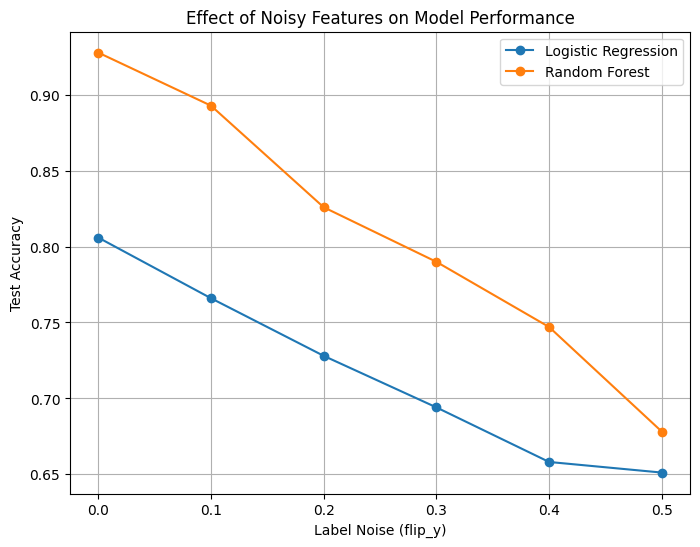

In [17]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

# Noise levels to test
noise_levels = np.linspace(0, 0.5, 6)  # from 0% to 50% label noise
logreg_acc = []
rf_acc = []

for noise in noise_levels:
    # Generate dataset with specified label noise
    X, y = make_classification(
        n_samples=5000,
        n_features=20,
        n_informative=5,
        n_redundant=0,
        n_repeated=0,
        n_classes=2,
        flip_y=noise,   # noise level
        random_state=42
    )
    # Train/test split
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Logistic Regression
    logreg_pipe = Pipeline([
        ("scaler", StandardScaler()),
        ("model", LogisticRegression(max_iter=5000))
    ])
    logreg_pipe.fit(X_train, y_train)
    logreg_acc.append(logreg_pipe.score(X_test, y_test))

    # Random Forest
    rf_pipe = Pipeline([
        ("model", RandomForestClassifier(n_estimators=100, random_state=42))
    ])
    rf_pipe.fit(X_train, y_train)
    rf_acc.append(rf_pipe.score(X_test, y_test))

# Plot results
plt.figure(figsize=(8,6))
plt.plot(noise_levels, logreg_acc, marker='o', label="Logistic Regression")
plt.plot(noise_levels, rf_acc, marker='o', label="Random Forest")
plt.xlabel("Label Noise (flip_y)")
plt.ylabel("Test Accuracy")
plt.title("Effect of Noisy Features on Model Performance")
plt.legend()
plt.grid(True)
plt.show()
